K-means clustering in Python from scratch

In [5]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("/content/Wine_clust .csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: xlabel='Magnesium', ylabel='Alcohol'>

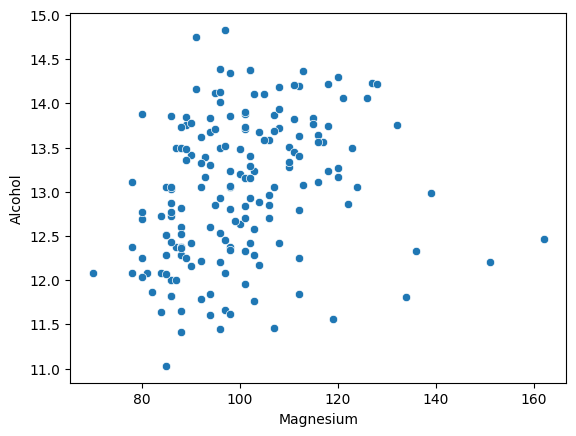

In [9]:
sns.scatterplot(y='Alcohol',x='Magnesium',data=data)

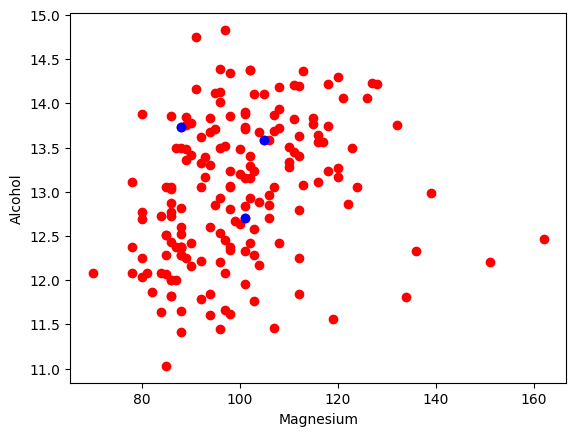

In [10]:
X=data
k=3
Centroids=(X.sample(n=k))
plt.scatter(X['Magnesium'],X['Alcohol'],c='red')
plt.scatter(Centroids['Magnesium'],Centroids['Alcohol'],c='blue')
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.show()

In [11]:
from sklearn.cluster import KMeans

# Fit a K-means model
kmeans=KMeans(n_clusters=k,random_state=0)
X["Cluster"]=kmeans.fit_predict(X[["Magnesium","Alcohol"]])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


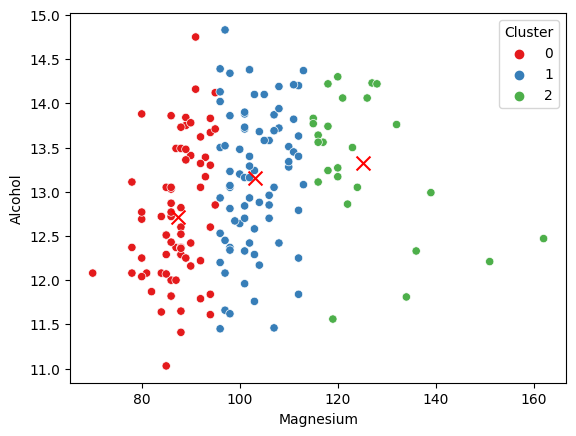

In [12]:
# Get cluster centroids
centroids=kmeans.cluster_centers_

#plot data & centroids
sns.scatterplot(data=X,x="Magnesium",y="Alcohol",hue="Cluster",palette="Set1")
plt.scatter(centroids[:,0],centroids[:,1],c= 'red',marker='x',s=100)
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.show()

inertia: 740.2434797630376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

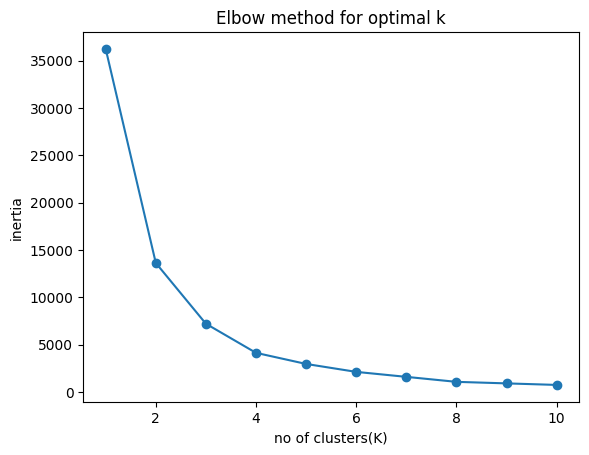

In [17]:
# Get inertia (W-cluster SS)
inertia= kmeans.inertia_
print("inertia:",inertia)

k_range=range(1,11)
inertia_values=[]

for K in k_range:
  kmeans=KMeans(n_clusters=K,random_state=0)
  kmeans.fit(X[["Magnesium","Alcohol"]])
  inertia=kmeans.inertia_
  inertia_values.append(inertia)
plt.plot(k_range,inertia_values,marker='o')
plt.title('Elbow method for optimal k')
plt.xlabel("no of clusters(K)")
plt.ylabel('inertia')
plt.show()


In [23]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X[["Magnesium","Alcohol"]],X["Cluster"])
print("silhouette score:",silhouette_avg)

silhouette score: 0.5491750582131716
